In [117]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [118]:
import numpy as np
import pandas as pd
import pandas
df=pandas.read_csv('D:/project/defaultall.csv', encoding='utf-8')

In [119]:
labels = df['STATUS']
train1 = df.drop(['STATUS','N','CID','PREV_STATUS'],axis=1)

In [120]:
from pandas import Series, DataFrame

In [ ]:
df.info

In [74]:
y=df[df['DATE'].isin([1551312000])]

In [121]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.1,random_state =2)

In [122]:
tree= DecisionTreeClassifier(random_state=2)

In [123]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [124]:
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

0.993517124307393
0.9737931297564325


In [125]:
tree=DecisionTreeClassifier(max_depth = 5, random_state=0,class_weight='balanced')
tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

0.9006312273700696
0.9008087127353183


In [126]:
y_pred = tree.predict(x_test)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.901
Accuracy on test set: 0.901


In [127]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9008087127353183

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import binarize

In [193]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [308]:
T=y_test

In [309]:
y= tree.predict_proba(x_test)[:, 1]

In [310]:
#y_pred_class = binarize(y, 0.3)[0]
y_pred=tree.predict(x_test)

In [311]:
t=0.23
y_scores=y
y_pred_adj = adjusted_classes(y_scores, t)
#y= tree.predict_proba(x_test)[:, 1]

In [312]:
y_scores

array([0.04405734, 0.98695831, 0.04405734, ..., 0.76006567, 0.1465336 ,
       0.60673773])

In [313]:
#T

In [314]:
Y=np.round(y,0)
#Y=np.round(y_pred_adj,0)

In [315]:
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds


In [316]:
fpr

array([0.        , 0.00382772, 0.00417212, 0.0044378 , 0.00753737,
       0.00831472, 0.01135525, 0.01177837, 0.01631456, 0.01733791,
       0.01968965, 0.02701054, 0.03237329, 0.03287512, 0.0347939 ,
       0.03841499, 0.05566434, 0.0575044 , 0.05840967, 0.09372509,
       0.09517156, 0.09608667, 0.1013707 , 0.23978864, 0.24040855,
       0.27335255, 0.66010017, 0.76320269, 0.82072678, 0.82110069,
       0.9999508 , 1.        ])

In [317]:
from sklearn.metrics import *

In [318]:
AUC = auc(fpr, tpr)

In [319]:
AUC

0.9164498316811351

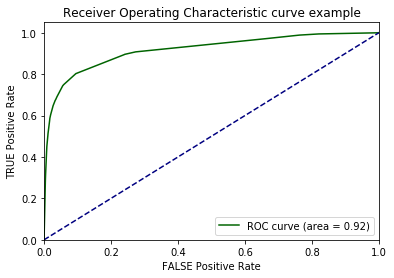

In [320]:
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

In [321]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [325]:
t=0.5
y_scores=y
y_pred_adj = adjusted_classes(y_scores, t)

In [326]:
from sklearn import metrics

In [327]:
print(metrics.confusion_matrix(y_test, y_pred_adj))

[[91862  9765]
 [  636  2595]]
